In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

### Read ProductRaw

In [2]:
data_product = pd.read_csv('Files/ProductRaw.csv')
data_product.head()

,item_id,name,description,rating,price,list_price,brand,group,url,image
0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,THÔNG TIN CHI TIẾT\nDung lượng pin 300\nThời g...,4.0,77000,300000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...
1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,THÔNG TIN CHI TIẾT\nDung lượng pin 2000mah\nTh...,4.5,132000,750000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...
2,299461,Chuột Không Dây Logitech M331 Silent - Hàng Ch...,THÔNG TIN CHI TIẾT\nThương hiệu Logitech\nĐộ p...,4.8,299000,399000,Logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,https://chuot-khong-day-logitech-m331-silent-p...,https://salt.tikicdn.com/cache/280x280/media/c...
3,57440329,Loa Bluetooth 5.0 Kiêm Đồng Hồ Báo Thức - [[ 2...,THÔNG TIN CHI TIẾT\nThương hiệu Acome\nXuất xứ...,4.7,149000,350000,Acome,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://loa-bluetooth-5-0-kiem-dong-ho-bao-thu...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4,38458616,Tai Nghe Bluetooth Apple AirPods Pro True Wire...,THÔNG TIN CHI TIẾT\nThương hiệu Apple\nXuất xứ...,4.8,5090000,8500000,Apple,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-apple-airpods-pro-t...,https://salt.tikicdn.com/cache/280x280/ts/prod...


In [3]:
# Change column 'item_id' to 'product_id' so later we can merge with review data
data_product.rename(columns = {'item_id':'product_id'}, inplace = True)

In [4]:
# Change column 'rating' to 'product_rating' so later we can merge with review data without intefering with column 'rating' in review data
data_product.rename(columns = {'rating':'product_rating'}, inplace = True)

In [5]:
# Change column 'name' to 'product_name'
data_product.rename(columns = {'name':'product_name'}, inplace = True)

In [6]:
data_product.shape

(4404, 10)

In [7]:
# Check duplicated values
data_product.duplicated().sum()

31

In [8]:
# Remove duplicated values
data_product = data_product.drop_duplicates()

In [9]:
data_product.shape

(4373, 10)

In [10]:
# Remove '\n' in column 'description'
data_product = data_product.replace(r'\n',' ', regex=True)

In [11]:
# Remove 'THÔNG TIN CHI TIẾT
data_product['description'] = data_product['description'].str.replace('THÔNG TIN CHI TIẾT', '')

In [12]:
data_product = data_product[['product_id', 'product_name', 'description', 'product_rating', 'group', 'price']]

In [13]:
data_product.head()

,product_id,product_name,description,product_rating,group,price
0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,Dung lượng pin 300 Thời gian pin - Thời gian ...,4.0,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,77000
1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,Dung lượng pin 2000mah Thời gian pin Thời gia...,4.5,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,132000
2,299461,Chuột Không Dây Logitech M331 Silent - Hàng Ch...,Thương hiệu Logitech Độ phân giải quang học 1...,4.8,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,299000
3,57440329,Loa Bluetooth 5.0 Kiêm Đồng Hồ Báo Thức - [[ 2...,Thương hiệu Acome Xuất xứ thương hiệu Indones...,4.7,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,149000
4,38458616,Tai Nghe Bluetooth Apple AirPods Pro True Wire...,Thương hiệu Apple Xuất xứ thương hiệu Mỹ Kích...,4.8,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,5090000


In [14]:
data_product['product_rating'].describe()

count    4373.000000
mean        3.671759
std         1.796905
min         0.000000
25%         3.800000
50%         4.500000
75%         4.800000
max         5.000000
Name: product_rating, dtype: float64

In [15]:
data_product.to_csv('Files/Product.csv')

### Read ReviewRaw

In [16]:
data_review = pd.read_csv('Files/ReviewRaw.csv')
data_review.head()

,customer_id,product_id,name,full_name,created_time,rating,title,content
0,709310,10001012,Lân Nguyễn Hoàng,Lân Nguyễn Hoàng,NaN,3,Ko dùng đc thẻ nhớ,Lúcđầu quên thông tin nên dùng 512gb thì ko đc...
1,10701688,10001012,Nguyễn Khánh Hòa,Nguyễn Khánh Hòa,NaN,5,Cực kì hài lòng,"Tiki giao hàng nhanh. Sản phẩm đúng như mô tả,..."
2,11763074,10001012,Toàn Phạm Khánh,Toàn Phạm Khánh,2019-04-17 15:42:45,5,Cực kì hài lòng,"chất lượng camera rõ nét, chống mưa nắng tuyệt..."
3,9909549,10001012,Nguyen Quang Minh,NaN,NaN,5,Rất hài lòng,"Hàng được đóng gói cẩn thận, giao hàng nhanh ,..."
4,1827148,10001012,Phạm Bá Đức,Phạm Bá Đức,NaN,5,Cực kì hài lòng,"dễ cài đặt, chất lượng tốt, chế độ xem hồng ng..."


In [17]:
data_review.shape

(364099, 8)

In [18]:
# Check duplicated values
data_review.duplicated().sum()

2349

In [19]:
# Remove duplicated values
data_review = data_review.drop_duplicates()

In [20]:
data_review.shape

(361750, 8)

In [21]:
# Change column 'rating' to 'customer_rating'
data_review.rename(columns = {'rating':'customer_rating'}, inplace = True)

In [22]:
# Change column 'name' to 'customer_name'
data_review.rename(columns = {'name':'customer_name'}, inplace = True)

In [23]:
data_review = data_review[['customer_id', 'product_id', 'customer_rating']]

In [24]:
data_review.head()

,customer_id,product_id,customer_rating
0,709310,10001012,3
1,10701688,10001012,5
2,11763074,10001012,5
3,9909549,10001012,5
4,1827148,10001012,5


In [25]:
data_review['customer_rating'].describe()

count    361750.000000
mean          4.474972
std           1.016888
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: customer_rating, dtype: float64

In [26]:
data_review.to_csv('Files/Review.csv')

### Merge two dataframes 

In [27]:
data = data_review.merge(data_product, on = 'product_id', how='left')

In [28]:
data.head()

,customer_id,product_id,customer_rating,product_name,description,product_rating,group,price
0,709310,10001012,3,Camera IP Wifi Ngoài Trời Ezviz CS-CV310 720P ...,Thương hiệu EZVIZ Kích thước Khối lượng gói h...,5.0,Máy Ảnh - Máy Quay Phim/Camera Giám Sát/Camera IP,789000.0
1,10701688,10001012,5,Camera IP Wifi Ngoài Trời Ezviz CS-CV310 720P ...,Thương hiệu EZVIZ Kích thước Khối lượng gói h...,5.0,Máy Ảnh - Máy Quay Phim/Camera Giám Sát/Camera IP,789000.0
2,11763074,10001012,5,Camera IP Wifi Ngoài Trời Ezviz CS-CV310 720P ...,Thương hiệu EZVIZ Kích thước Khối lượng gói h...,5.0,Máy Ảnh - Máy Quay Phim/Camera Giám Sát/Camera IP,789000.0
3,9909549,10001012,5,Camera IP Wifi Ngoài Trời Ezviz CS-CV310 720P ...,Thương hiệu EZVIZ Kích thước Khối lượng gói h...,5.0,Máy Ảnh - Máy Quay Phim/Camera Giám Sát/Camera IP,789000.0
4,1827148,10001012,5,Camera IP Wifi Ngoài Trời Ezviz CS-CV310 720P ...,Thương hiệu EZVIZ Kích thước Khối lượng gói h...,5.0,Máy Ảnh - Máy Quay Phim/Camera Giám Sát/Camera IP,789000.0


In [29]:
# Check null values
data.isnull().sum()

customer_id          0
product_id           0
customer_rating      0
product_name       660
description        671
product_rating     660
group              660
price              660
dtype: int64

In [30]:
data.shape

(361750, 8)

In [31]:
data = data.dropna().reset_index(drop=True)

In [32]:
data.shape

(361079, 8)

In [33]:
# Check duplicated values
data.duplicated().sum()

1539

In [34]:
# Remove duplicated values
data = data.drop_duplicates()

In [35]:
data.shape

(359540, 8)

In [36]:
data.to_csv('Files/Data_FULL.csv')

### EDA

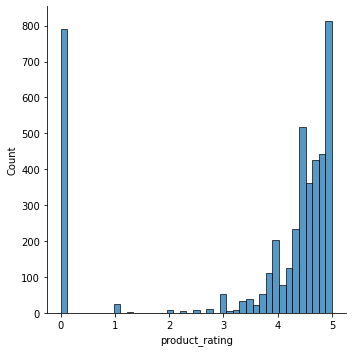

In [37]:
# Display the distribution of product_rating scores
sns.displot(data_product['product_rating'])

- A lot of products have 0 and 5 stars rating. Majority of products have 4 - 5 stars

In [38]:
# Count how many products each customer has rated
ratings_per_customer = data_review.groupby(['customer_id'], 
                                   as_index = False)['product_id'].count()
print('The median number of ratings per customer: ', 
      ratings_per_customer['product_id'].median())
print('The average number of ratings per customer: ', 
      ratings_per_customer['product_id'].mean())

ratings_per_customer.head()

The median number of ratings per customer:  1.0
The average number of ratings per customer:  1.4384212556314142


,customer_id,product_id
0,10,2
1,27,2
2,28,1
3,36,3
4,50,2


In [39]:
# Get the average rating per group product
product_rating_average = data.groupby('group')['customer_rating'].mean().reset_index()
product_rating_average.rename(columns = {'customer_rating' : 'average_ratings'}, inplace = True)
product_rating_average.sort_values(by = 'average_ratings', ascending=False).head(5)

,group,average_ratings
3,Laptop - Máy Vi Tính - Linh kiện/Laptop/Laptop...,5.000000
53,Laptop - Máy Vi Tính - Linh kiện/Thiết Bị Văn ...,5.000000
170,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Chơi Game v...,4.888889
117,Thiết Bị Số - Phụ Kiện Số/Phụ Kiện Điện Thoại ...,4.878571
235,Điện Tử - Điện Lạnh/Âm thanh & Phụ kiện Tivi/P...,4.857143


In [40]:
product_rating_average.sort_values(by = 'average_ratings', ascending=True).head(5)

,group,average_ratings
246,Đồng hồ và Trang sức/Trang sức/Vòng tay,1.000000
245,Điện Tử - Điện Lạnh/Âm thanh & Phụ kiện Tivi/Đ...,3.000000
143,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,3.400000
211,Điện Tử - Điện Lạnh/Phụ kiện điện lạnh/Phụ kiệ...,3.675676
238,Điện Tử - Điện Lạnh/Âm thanh & Phụ kiện Tivi/P...,3.700000


- Laptop - Máy Vi Tính has the highest average_ratings from customers
- Đồng hồ và Trang sức/Trang sức/Vòng tay has the lowest average_ratings from customers

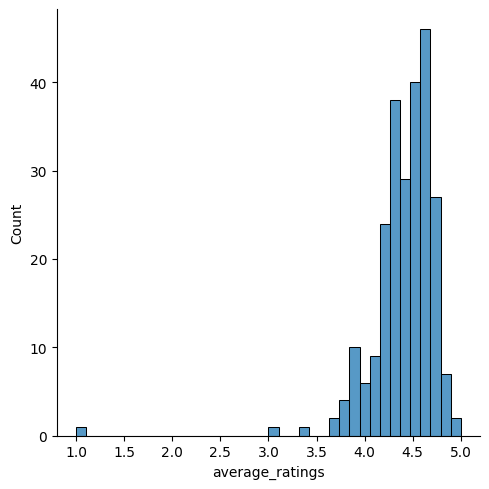

In [41]:
# Display the distribution of average_ratings 
sns.displot(product_rating_average['average_ratings'])

- Customers' average ratings vary from 4 to 4.8 stars

In [42]:
# Customer who submitted the most reviews
data.customer_id.value_counts().head(5)

7737978    48
6106142    37
7377207    35
7280719    35
1064154    34
Name: customer_id, dtype: int64

- Customer with customer_id = 7737978 had posted the most reviews

In [43]:
# # Find max min price based on group
# df1 = (data.set_index('group')
#          .groupby(['group'])
#          .agg(min_price=('price', 'min'),
#               max_price=('price', 'max')))
# df1.head()

In [44]:
# Highest price per group
product_pivot = data.pivot_table(index='group', values='price', aggfunc={'price': ['max', 'count']}).reset_index()

In [45]:
top_5_product = product_pivot.sort_values('max', ascending=False).head()
top_5_product

,group,count,max
214,Điện Tử - Điện Lạnh/Tivi/Smart Tivi - Android ...,1877,51990000.0
80,Máy Ảnh - Máy Quay Phim/Máy Ảnh/Máy Ảnh Mirror...,321,44990000.0
220,Điện Tử - Điện Lạnh/Tủ lạnh,2670,39389000.0
201,Điện Thoại - Máy Tính Bảng/Điện thoại Smartphone,17210,37990000.0
215,Điện Tử - Điện Lạnh/Tivi/Tivi 4K,1934,37979000.0


- Điện Tử - Điện Lạnh/Tivi/Smart Tivi - Android TV has the highest price among other products groups

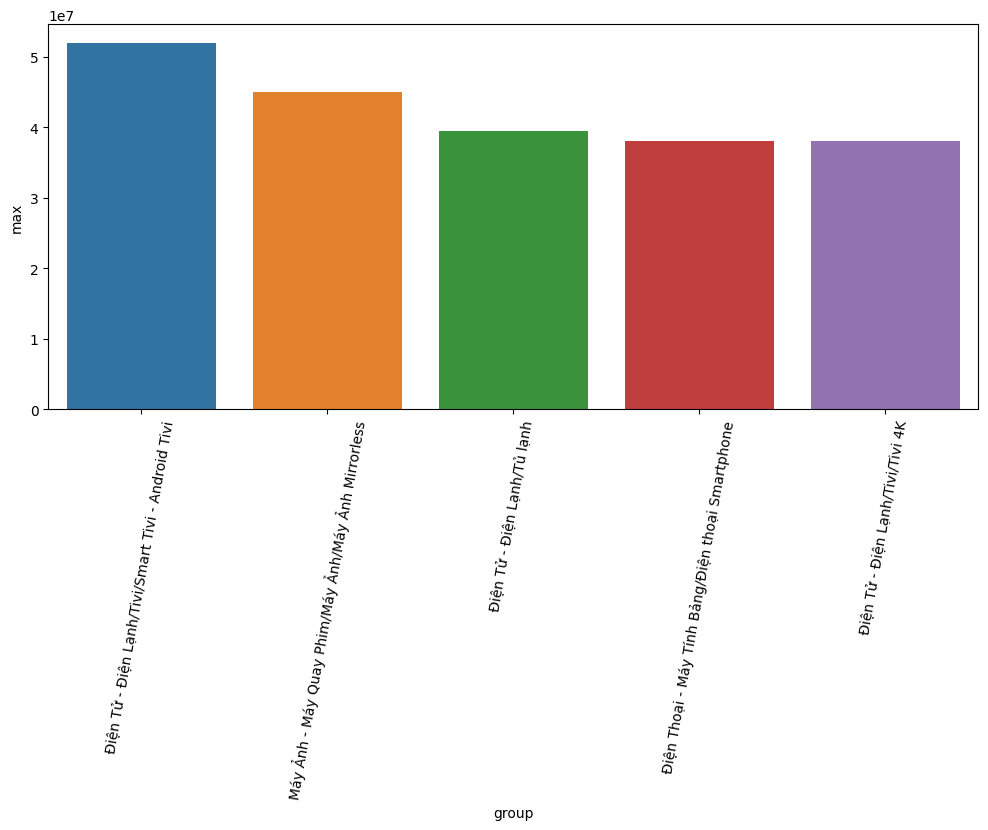

In [46]:
plt.figure(figsize=(12,5))
sns.barplot(x='group', y='max', data=top_5_product)
plt.xticks(rotation=80)
plt.show()

In [47]:
# Rating count
agg_ratings = data.groupby('product_name').agg(mean_rating = ('customer_rating', 'mean'), number_of_ratings = ('customer_rating', 'count')).reset_index()

In [48]:
agg_ratings.sort_values(by='number_of_ratings', ascending=False).head()

,product_name,mean_rating,number_of_ratings
904,Chuột Không Dây Logitech M331 Silent - Hàng Ch...,4.719193,4658
2951,Tai Nghe Nhét Tai Mi Basic Xiaomi HSEJ03JY - H...,4.626057,2602
2542,Pin Sạc Dự Phòng Xiaomi Redmi 20000mAh PB200LM...,4.651201,2414
3400,USB Kingston DT100G3 32GB USB 3.0 - Hàng Chính...,4.486358,2309
1247,Dây cáp sạc đa năng Baseus Rapid 4 in 1 Type-C...,4.556164,2190


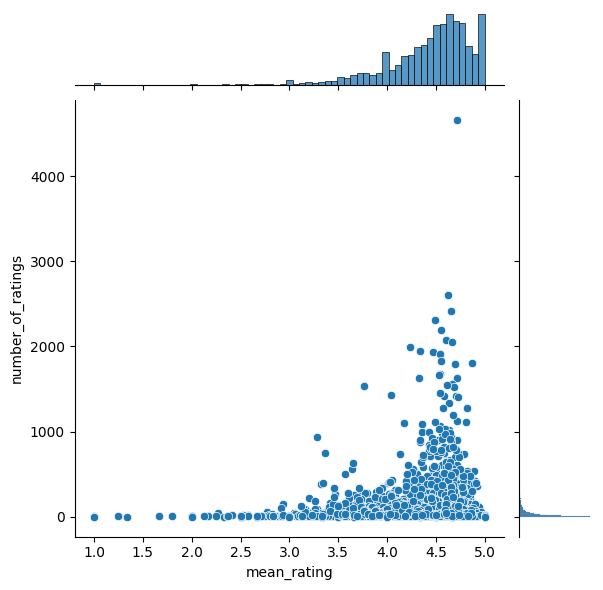

In [49]:
sns.jointplot(x='mean_rating', y='number_of_ratings', data=agg_ratings)

- Most products have less than 1000 ratings

In [50]:
# Top rated product
def plot_product_by(agg_ratings, col, n_rows=10):
    plt.figure(figsize=(12,7))
    ax = sns.barplot(x=agg_ratings[col].head(n_rows), y=agg_ratings['product_name'].head(n_rows), data=agg_ratings)
    plt.xlabel('Score of ' + col)
    plt.ylabel("Product's name")    

In [51]:
product_sorted_ratings = agg_ratings[agg_ratings['mean_rating']>=4].sort_values('mean_rating', ascending=False)

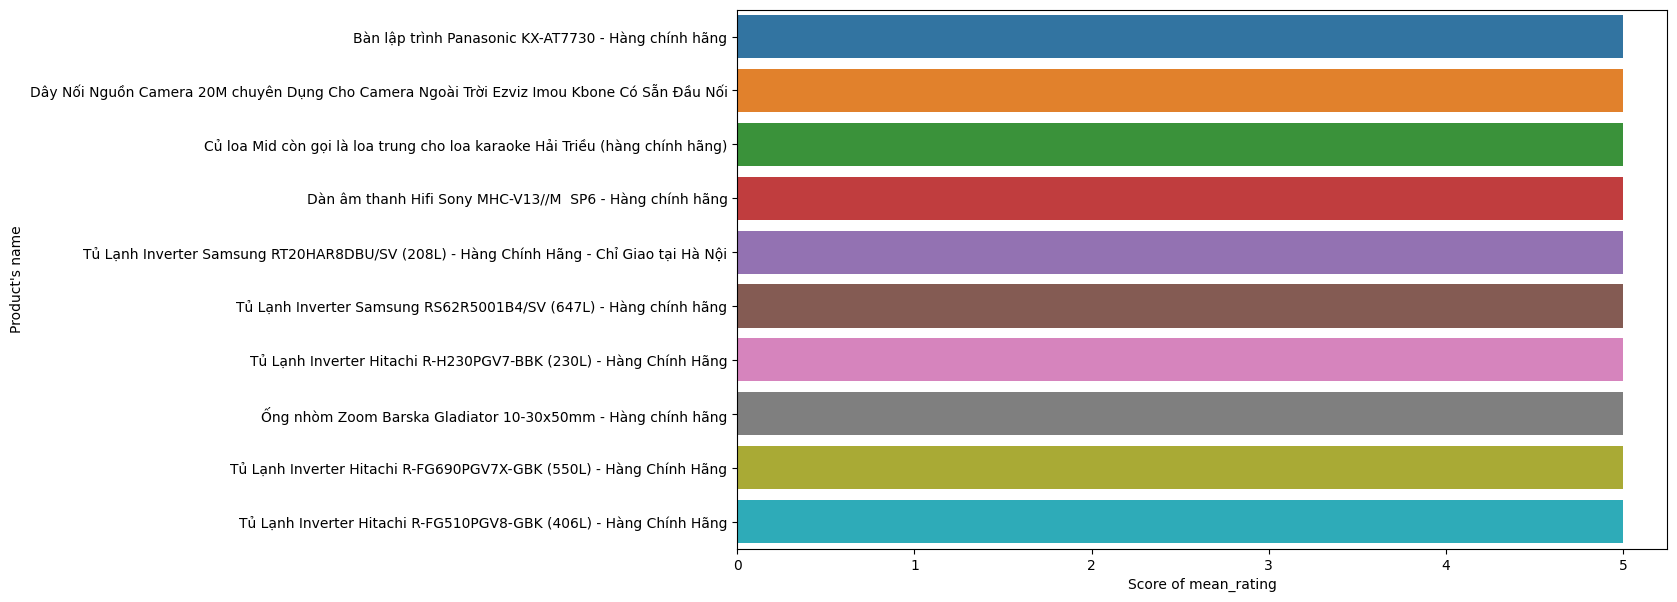

In [52]:
plot_product_by(product_sorted_ratings, 'mean_rating', 10)

- Bàn lập trình Panasonic KX-AT7730 has the highest mean_rating